# Which Variables Contribute to the Likelihood of Individuals having a Stroke?

DS3001 Midterm Project 2: Group 15

Members: Aniyah McWilliams, Libby Vanty, Emily Brown, Ananya Sai, Tori Stoner, and Hadley Krummel

## Summary:

The research question for this paper is which variables contribute to predicting the likelihood a person has a stroke. The aim is to create a predictive algorithm using these variables to be able to make predictions about one’s likelihood of having a stroke based on variables including age, health, and gender. The methods include the production of bar plots, box plots, and kernel density plots to analyze the relationship between various variables and stroke. After close analyzation of the visualization of the variables, the information was then used to create a k-means-clustering for further analysis. Using the information these methods provided, the most influential variables were used to create a predictive model. This model included the use of linear regression and decision trees to predict an individuals likelihood of stroke.


## Data:

This dataset is composed of many different variables that are evaluated to predict the likelihood that someone will have a stroke. The first variable included in this dataset is age which is a numeric variable that reflects the participants age. The numeric variable avg_glucose_level is a measure of blood sugar levels. The bmi variable is body mass index which is a value calculated using height and weight. The ever_married variable is of character type and is binary. The two potential responses for this variable are yes and no. Gender is also of character type with three potential values: male, female, other. The composition of the gender variable in the dataset is 41% male and 59% female which is important to consider when evaluating the gender variable. There are two dummy variables in the dataset: heart_disease and hypertension, which is having high blood pressure, that are used to indicate whether or not a patient has heart disease and/or hypertension. The ID variable is a representation of the study identification number. The Residence_type is a character variable with two responses: urban and rural to identify the area in which the patients live. Smoking_status is a categorical variable used to identify whether patients were former smokers, current smokers, or have never been a smoker. The work_type variable provides information about the patient's employment type. The potential responses for this variable are never_worked, children, govt_job, Private, and self-employed. The response children is used to represent homemakers, govt_job is public sector employment and private is private sector employment. The final variable in this dataset is stroke which indicates whether the patients suffered a stroke in the sample period. These variables were analyzed to evaluate their relationship to stroke to create a predictive model on the likelihood of a person experiencing a stroke.

The primary variables of interest in this paper are the presence of hypertension, gender, smoking status, the presence of heart disease, age, body mass index, and the average glucose level. Each variable was plotted against stroke to more thoroughly investigate the relationship and see how it contributes to the likelihood of stroke. These variables were chosen as previous research has demonstrated that they are risk factors for stroke.

There were a few minor issues when it came to reading, cleaning, and preparing the data for analysis. Firstly, trying to make sure that the data file was able to be read given the size of the file. Therefore, we decided to use low_memory=True in order to mitigate this when reading both CSV files. Another one of the issues with the data was figuring out what the “Unnamed: 0” and “id” columns meant. Ultimately, it was decided to get rid of these columns altogether in hopes of not having an ordering/sequencing issue for the model and analysis later. Next, we had to make sure to drop the outcome variable for this data, which was the ‘stroke’ column, so that our model could actually be used for prediction purposes. Next, a decision was made to drop the NaNs in the columns left over. There could’ve been another way to do this, such as using kNN to predict the values/replace them, but ultimately we decided instead to just drop them altogether as there weren’t that many and we felt there was enough data to perform our analysis. Following, it was decided to windsorize the numeric columns. This of course also had a trade-off, most notably another alternative would be to drop the values that were considered outliers. However, we decided against this in order to include more data in our analysis. Ergo, windsorizing was the course of action taken. Then, we created a new CSV file titled “training_cleaned.csv” for analysis. For the “testing_cleaning.csv” file that was created, the same decision to drop the “Unnamed: 0” and “id” columns along with NaNs to be consistent for analysis. Moreover, we removed the outcome variable from the rest of the independent variables. The most notable difference therefore was not to windsorize the testing data in order to make sure it is good to compare for the model since there will be outliers the model could come across. Altogether, this was not a super difficult data set to clean, but there were some trade-offs that had to be made when cleaning and preparing the data for the model creation and subsequent analysis.

In [2]:
## Importing the necessary packages into python for cleaning and data visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Naming the data frame and reading the csv into j

df = pd.read_csv('./Data/training_cleaned.csv', low_memory = True)

In [4]:
## Getting the exact columns names for easier reproduction

df.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [5]:
## Setting specific names for the variables

var1 = 'sex' #need numeric -- gender
var2 = 'year'
cat1 = 'class'
cat2 = 'finalter' # finalter

## Results:

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


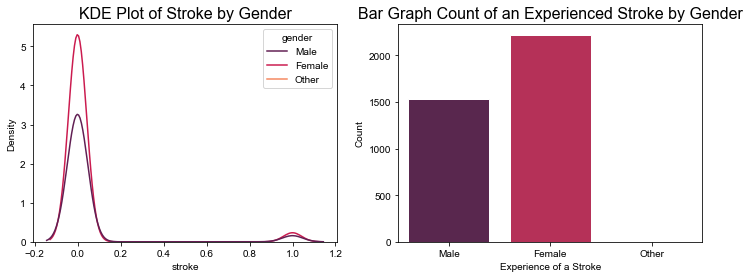

<Figure size 432x288 with 0 Axes>

In [6]:
# making a kernel density plot and bar plot of stroke grouped by gender

# creating two plot spaces for stacked plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

y = 'stroke'
gender = 'gender'

# Plot for the first subplot (KDE)
sns.kdeplot(data=df, x=y, hue = gender, palette = 'rocket',ax=axes[0])
axes[0].set_title("KDE Plot of Stroke by Gender",fontsize=16)


# Plot for the second subplot (Bar)
stroke_xp = df.loc[df['stroke'] == 0]
sns.set(style="whitegrid")
sns.countplot(x=gender,data=stroke_xp, palette="rocket",ax=axes[1])
axes[1].set_title("Bar Graph Count of an Experienced Stroke by Gender",fontsize=16)
plt.xlabel("Experience of a Stroke")
plt.ylabel("Count")
plt.show()


plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()

### Fig. 1

The above graphs are a representation of experienced stroke by gender in a kernel density plot and a bar plot. Both plots demonstrate that from this data there were no participants that selected other for their gender identification. The bar graph demonstrates that more female participants have experienced a stroke than male participants, with the count for female being higher by about 800. In the kernel density plot, 0 on the x axis represents not having experienced a stroke and 1 represents having experienced a stroke. The kernel density plot reflects the same trend, as more women experienced stroke than men as can be seen by the higher density.The kernel density plot also shows that more women than men in the dataset have not experienced a stroke. The plot demonstrates that more participants, both men and women, have not experienced a stroke. While both plots demonstrate that women are more likely to experience a stroke, it is important to note that there were more female participants than male participants in this dataset which has an influence on the representation of the data in the plots.

The above was reaffirmed during the predictive modeling process. When the data included gender, it performed better. However, the better performance was only marginal. For performance purposes the gender was kept in, but gender alone is not a good indicator of the likelihood of stroke.

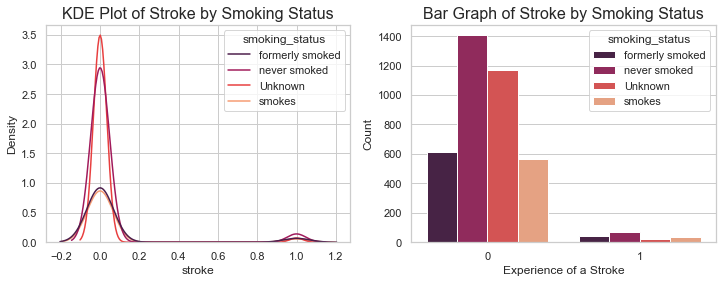

<Figure size 432x288 with 0 Axes>

In [7]:
# creating two plot spaces for stacked plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


# Plot for the first subplot (KDE)
smoking = 'smoking_status'
sns.kdeplot(data=df, x=y, hue = smoking, palette = 'rocket',ax=axes[0])
axes[0].set_title('KDE Plot of Stroke by Smoking Status',fontsize=16)


sns.countplot(x="stroke", hue=smoking, data=df, palette="rocket",ax=axes[1])
axes[1].set_title("Bar Graph of Stroke by Smoking Status",fontsize=16)
plt.xlabel("Experience of a Stroke")
plt.ylabel("Count")
plt.show()


plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()

### Fig. 2

Analysis: The above graph is a kernel density plot of stroke by smoking status. There are four potential responses for the smoking status variable: formerly smoked, never smoked, unknown, and currently smokes. The kernel density plot demonstrates that for people who have not experienced a stroke, which is represented as 0 on the x axis, the unknown group has had the least people experience strokes, followed by never smoked, formerly smoked and currently smokes. For people that have experienced a stroke, which is represented as 1 on the x axis, the group most likely to experience stroke was never smoked, then smokes, formerly smoked, and unknown. This is interesting because previous research has shown that smoking can increase the likelihood of experiencing a stroke but the data shows that people who had never smoked were more likely to experience a stroke than those who both were current smokers and former smokers. It is difficult to draw any conclusions about the unknown group because this category provides no additional information about the participants and their smoking history.

During predictive modeling, the smoking variable was vital to the performance of the algorithm. Despite not holding up to traditional research, the presence of the variable lowered the RMSE substantially.

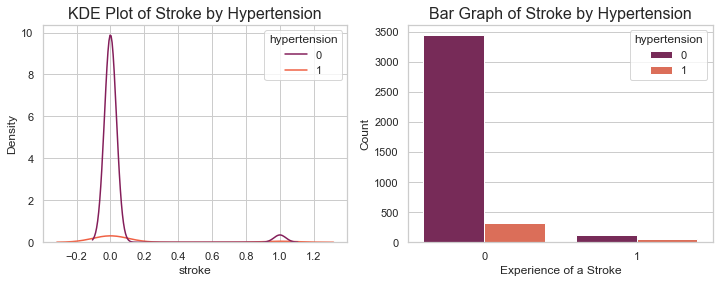

<Figure size 432x288 with 0 Axes>

In [8]:
# creating two plot spaces for stacked plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for the first subplot (KDE)

hypertension = 'hypertension'
sns.kdeplot(data=df,x=y,hue=hypertension, palette = 'rocket',ax=axes[0])
axes[0].set_title('KDE Plot of Stroke by Hypertension',fontsize=16)


sns.countplot(x="stroke", hue=hypertension, data=df, palette="rocket",ax=axes[1])
axes[1].set_title("Bar Graph of Stroke by Hypertension",fontsize=16)
plt.xlabel("Experience of a Stroke")
plt.ylabel("Count")
plt.show()


plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()

### Fig. 3  

The above graphs demonstrate the relationship between the presence of hypertension and experience of stroke. The bar graph demonstrates that a greater number of people have experienced a stroke if they did not have hypertension compared to if they did have hypertension. There is also a greater number of people who have hypertension and did not experience a stroke than experienced a stroke and had hypertension. A majority of the people in this dataset do not have hypertension and also have not experienced a stroke. From the kernel density plot, for those who have experienced a stroke, they were more likely to not have hypertension as the density is higher than for those who did have hypertension. Similarly to smoking status, these results are interesting because hypertension has previously been found to increase the likelihood of having a stroke but in this dataset people without hypertension experienced strokes more than those with hypertension.

The visualization of this is interesting, as during k-means clustering, hypertension presence correlated to the higher presence of a stroke. However, that could be due to the fact that hypertension was higher in groups with higher average ages. Age was a very important factor in the performance of the model.

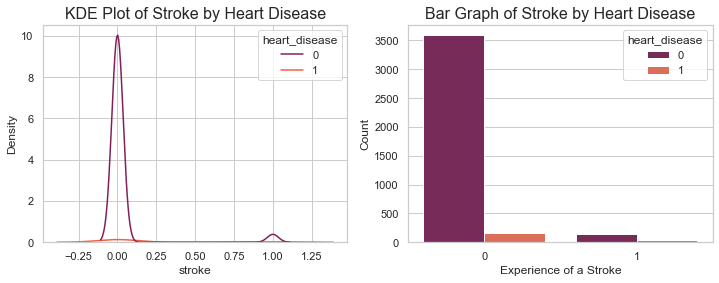

<Figure size 432x288 with 0 Axes>

In [9]:
# creating two plot spaces for stacked plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for the first subplot (KDE)

heart = 'heart_disease'
sns.kdeplot(data=df,x=y,hue=heart, palette = 'rocket',ax=axes[0])
axes[0].set_title('KDE Plot of Stroke by Heart Disease',fontsize=16)


sns.countplot(x="stroke", hue=heart, data=df, palette="rocket",ax=axes[1])
axes[1].set_title("Bar Graph of Stroke by Heart Disease",fontsize=16)
plt.xlabel("Experience of a Stroke")
plt.ylabel("Count")
plt.show()


plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()

### Fig. 4


The above bar plot and kernel density plot represent the relationship between stroke and heart disease. From the bar plot it is clear that a majority of participants have not experienced a stroke or heart disease. For participants who have had a stroke, there is a higher number that did not have heart disease. There is also a higher number of participants that had heart disease and did not experience a stroke than had heart disease and experienced a stroke. This pattern is also reflected in the kernel density plot as those who did not have heart disease were more likely to experience a stroke than those who did have heart disease. In general, more of the participants did not have heart disease and also did not experience a stroke, but if they did experience a stroke they were more likely to not have heart disease.

For three of the previously mentioned variables: heart disease, hypertension and smoking status, the results contradict previous research. Each of these variables has been identified as a risk factor for experiencing a stroke. According to the National Heart, Lung, and Blood Institute, factors that people can control account for 82%-92% of strokes: high blood pressure, obesity, physical inactivity, poor diet, and smoking. However, in this dataset each variable showed that people who did not have heart disease, hypertension and were non-smokers were more likely to experience a stroke than participants who did have heart disease, hypertension or smoked. It is interesting to think about what factors could have caused this pattern such as participants having other underlying health conditions that would make them more susceptible to stroke that increased their likelihood over other participants who also experienced risk factors. Other risk factors include: family history, anxiety, depression and high stress levels, and other medical conditions. These variables were not included in the dataset and could have contributed to the trends discovered in this dataset.

Sources: https://www.nhlbi.nih.gov/health/stroke/causes

However, similarly to the results in hypertension, the presence of heart-disease during predictive modeling was vital. Though, it follows the same problem with age as hypertension did.

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


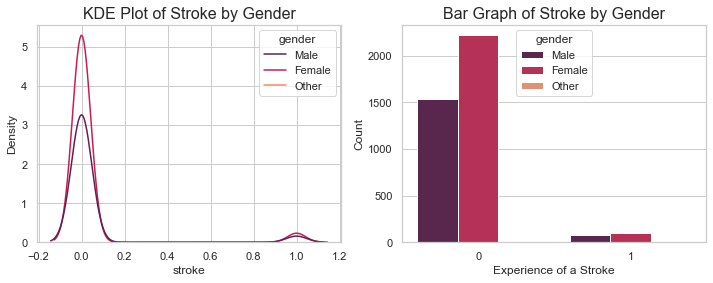

<Figure size 432x288 with 0 Axes>

In [25]:
## Bar graph for Stroke Likelihood by Gender


# creating two plot spaces for stacked plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for the first subplot (KDE)


sns.kdeplot(data=df,x='stroke',hue='gender', palette = 'rocket',ax=axes[0])
axes[0].set_title('KDE Plot of Stroke by Gender',fontsize=16)


sns.countplot(x="stroke", hue='gender', data=df, palette="rocket",ax=axes[1])
axes[1].set_title("Bar Graph of Stroke by Gender",fontsize=16)
plt.xlabel("Experience of a Stroke")
plt.ylabel("Count")
plt.show()


plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()

### Fig. 5

This is a bar graph that illustrates the likelihood of stroke by gender. Males are denoted by the color purple, and females are denoted by the color pink. On the x-axis, 0 indicates that the individuals have not suffered a stroke in the given time period and 1 indicates that they have experienced a stroke. While the results may be a little biased due to a greater percentage of women who have answered the questionnaire, by a slight amount, there is a greater amount of women than men who have experienced a stroke. Even with the potential bias, this finding tracks alongside the CDC’s and other esteemed research publications that women do experience strokes more often than men. This could be due to a lot of other factors such as women tending to live longer than men (which increases the likelihood of them having a stroke), having greater risk during pregnancy (e.g., higher blood pressure tends to cause a higher risk of stroke), utilizing certain birth control medications, etc. However, it is interesting to note that the sampled population has a significantly higher count of both women and men who have not experienced a stroke than those who have. This could be due to maybe having generally more physically healthy individuals or maybe sampling from a younger population (as usually, people over the age of 55 have a higher probability of getting a stroke than others).

Source: https://www.cdc.gov/stroke/women.htm#:~:text=Because%20women%20generally%20live%20longer,especially%20if%20they%20also%20smoke.

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


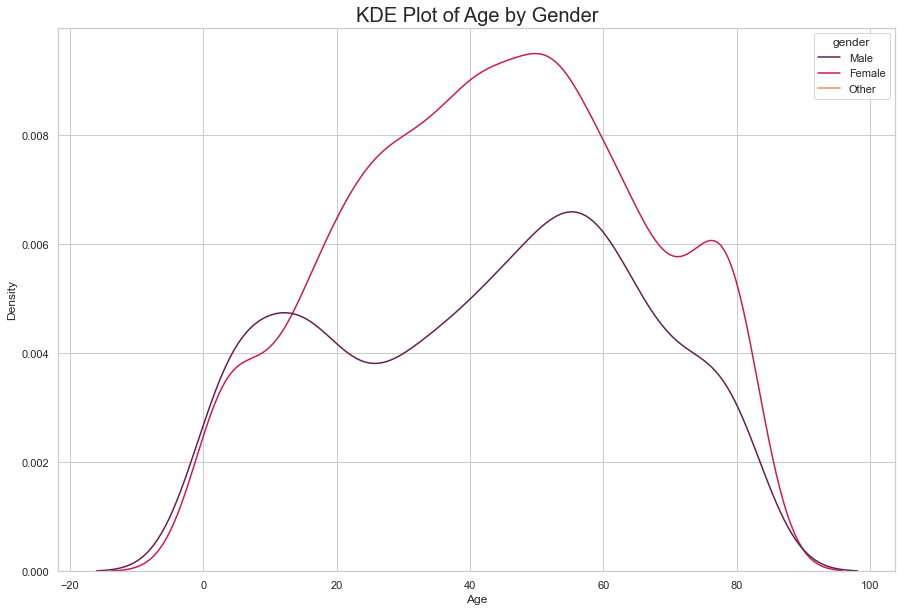

In [35]:



# Display the plot (for interactive environments)

plt.figure(figsize=(15, 10))

## Graphing the KDE plot by Class

sns.kdeplot(data=df, x='age', hue = 'gender',palette='rocket') # By class -- all
plt.title("KDE Plot of Age by Gender",fontsize=20)
plt.xlabel('Age')


# Display the plot (for interactive environments)

plt.show()


### Fig. 6

This is a KDE plot that showcases the distribution of the ages of the individuals separated by gender. Females are denoted by the pink line and males are denoted by the purple line. As discussed above, there is an overall trend in which there is a greater distribution of females than males. Interestingly, for females, there is a larger distribution in the age range 20 to 65, whereas for males there is a larger distribution of individuals in the age range 40 to 70. The greater variability in the age range could be a reason for why in graph 1 there were a larger number of individuals who did not experience a stroke in the time period than those who did. There is a higher distribution of females greater than 55 than males, which could also contribute to the higher number of females experiencing strokes seen in Graph 1.

During k-means clustering, it became clear that age was the biggest variable in predicting the likelihood of stroke. That makes sense, as older individuals tend to have strokes more than younger ones.

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


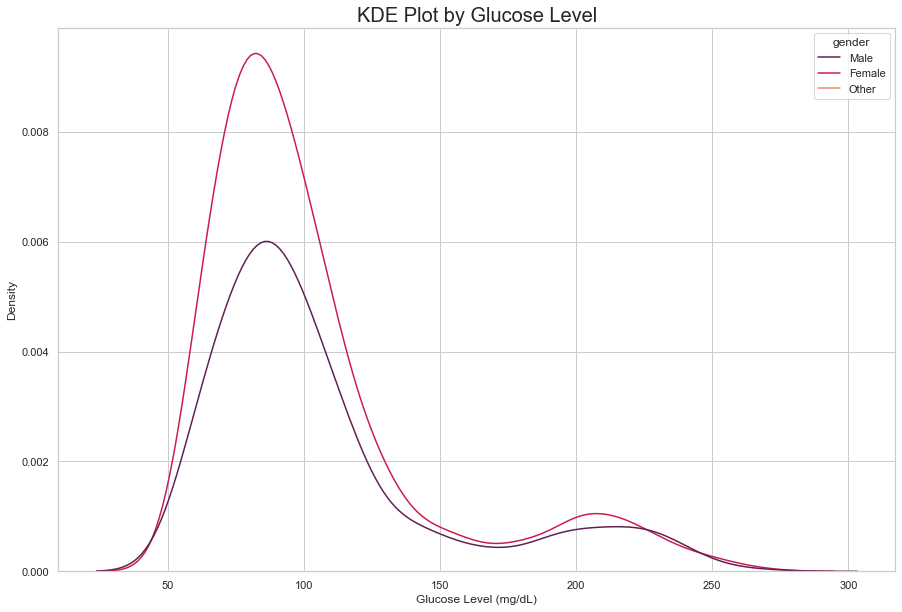

In [36]:
# Set the figure size
plt.figure(figsize=(15, 10))

## Graphing the KDE plot by Class

sns.kdeplot(data=df, x='avg_glucose_level', hue = 'gender',palette='rocket') # By class -- all
plt.title("KDE Plot by Glucose Level",fontsize=20)
plt.xlabel('Glucose Level (mg/dL)')


# Display the plot (for interactive environments)

plt.show()

### Fig. 7

This is a KDE plot that showcases the distribution of the average glucose level of the individuals separated by gender. Females are denoted by the pink line and males are denoted by the purple line. Intriguingly, there is a larger distribution of individuals within the normal range of average glucose level (70 mg/dl to 126 mg/dl) than those who are at risk and are way above it. This again supports the analysis found in Graph 1, as the reasoning for there being a significantly higher count of women and men who have not experienced a stroke within the time period could be partly because there is a higher distribution of physically healthy individuals as explained by the higher distribution of those in the normal range of average glucose level. Both females and males also see a spike around the 200 mg/dl average glucose level, in which females have a slightly larger distribution than males. The elevated average glucose level along with the smaller distribution of individuals who have it could track alongside the individuals who experienced a stroke in Graph 1.

Glucose had the most interesting relationship during predictive modeling. In linear regression, the presence of glucose lowered the RMSE value. However when using decision trees, including glucose raised the RMSE value. This could mean that glucose has a more linear relationship, so it is best used with a linear model.

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


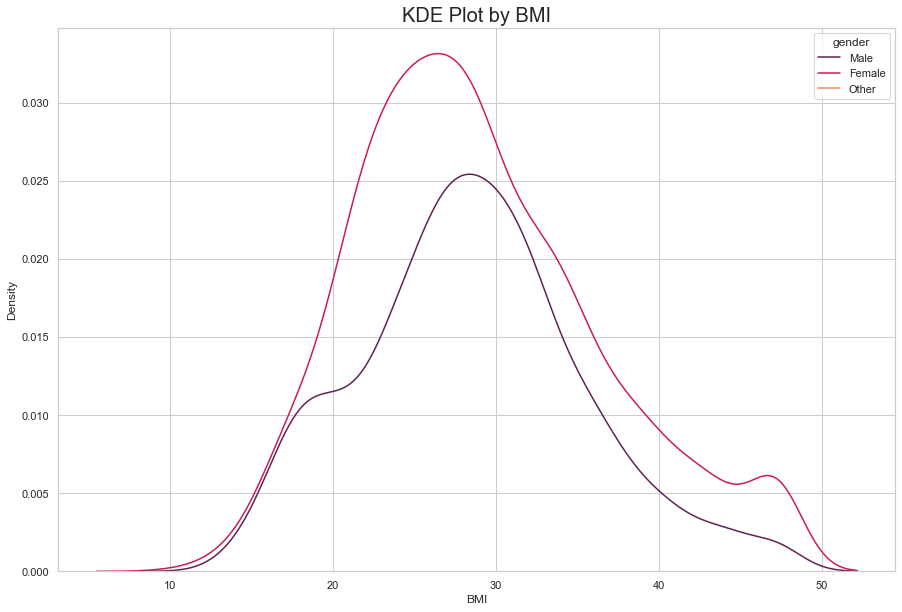

In [37]:
# Set the figure size
plt.figure(figsize=(15, 10))

## Graphing the KDE plot by Class

sns.kdeplot(data=df, x='bmi', hue = 'gender',palette='rocket') # By class -- all
plt.title("KDE Plot by BMI",fontsize=20)
plt.xlabel('BMI')


# Same color and add a bar graph next to it 

# Display the plot (for interactive environments)

plt.show()

### Fig. 8

This is a KDE plot that showcases the distribution of the body mass index of the individuals separated by gender. Females are denoted by the pink line and males are denoted by the purple line. Generally, there seems to be a higher concentration of individuals who have a healthy body mass index for both men and women. Women’s highest peak in this graph falls around 20 to 30, which tracks within the normal weight classification for women (with the numbers nearing 30 on the edge of being classified as overweight, which is the tail-end portion of this peak). However, men’s highest peak in this graph falls around 25 to 35, which falls around the range of overweight to slightly obese in the normal weight classification for men. This could be explained by the trend we saw in Graph 2 where there was a larger distribution of older men (40 to 70) than there were women (who were more spread out). Typically, individuals who are between the ages of 51 to 69 tend to be more overweight/obese than their other range counterparts. With there being a higher distribution of men in that age range, this could explain why men have a higher concentration of individuals who are slightly obese/overweight category. Yet, it is interesting to note that despite there being a higher concentration of men who are like this, they maintained a healthier concentration of the average glucose level and still lesser in count than women who experienced a stroke in this timeframe.

For BMI, it was found that including BMI corresponded to a lower RMSE. Although the difference was only by about a 0.01 difference, it was determined to be integral to the models performance.

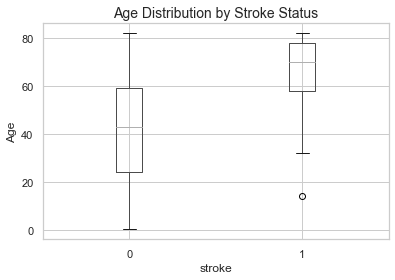

In [23]:
X = df.iloc[:,[1,7,8]]
# X = df[:,[1,7,8]]
# X.plot.box() # Hmm, outliers

## grouped by stroke and AGE

df.head()

# Create a boxplot without the automatic title
bp = df.boxplot(column=['age'], by='stroke')

# Set labels and title
plt.ylabel("Age")
plt.title("Age Distribution by Stroke Status", fontsize=14)

# Remove the default title
plt.suptitle("")

# Show the plot
plt.show()

## From Chat GPT

### Fig. 9

This is a box plot that plotted the age distribution of the individuals who experienced or did not experience a stroke. On the x-axis, 0 indicates that the individuals have not suffered a stroke in the given time period and 1 indicates that they have experienced a stroke. The average age of individuals who suffered a stroke in this time period was around 70 and had a way smaller yet more aged range of individuals than the boxplot of those who did not suffer a stroke (in which the median age was around 42 and the range was from 0 to 82). The median age of those who experienced a stroke tracks alongside the typical age of those who suffer it (as discussed before in graph 1, above the age of 55, the probability of receiving a stroke doubles). The smaller yet higher age range of individuals in those who experienced the stroke also tracks alongside the fact that older individuals typically are more susceptible to having a stroke than their younger counterparts. Interestingly, there is one outlier for the boxplot of those who experienced a stroke, in which their age is less than 20 years old. While this does not affect the above analysis, it is quite intriguing that someone that young suffered a stroke.

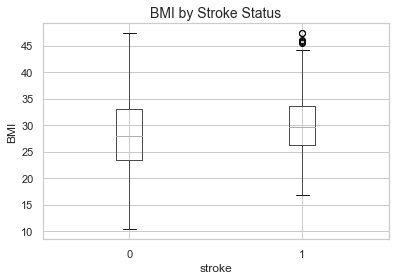

In [22]:
# df.boxplot(column=['bmi'], by= 'stroke')
# plt.ylabel("BMI")
# plt.title("My Title", y=1.20,fontsize = .5)

# Create a boxplot without the automatic title
bp = df.boxplot(column=['bmi'], by='stroke')

# Set labels and title
plt.ylabel("BMI")
plt.title("BMI by Stroke Status", fontsize=14)

# Remove the default title
plt.suptitle("")

# Show the plot
plt.show()



### Fig. 10

 This is a box plot that plotted the body mass index distribution of the individuals who experienced or did not experience a stroke. On the x-axis, 0 indicates that the individuals have not suffered a stroke in the given time period and 1 indicates that they have experienced a stroke. Overall, the range of the BMI of those who experienced a stroke is less than the range of the BMI of those who did not. This tracks alongside the observations we have made that there is more variability amongst those who have not experienced a stroke than those who have (as typically a similar demographic of individuals are usually more susceptible to experiencing a stroke). However notably, the boxplot of those who have experienced a stroke have a median BMI around 30. As talked about in graph 4, typically individuals who have a BMI of 30 tend to only be slightly overweight. While this should only slightly elevate their risk of having a stroke, coupled with our findings in Graphs 1 and 5, it seems like there is a higher proportion of individuals who are above the age of 55, which then drastically increases their likelihood of experiencing a stroke. There are also a couple of outliers in the boxplot for those who have had a stroke (those with a morbidly obese BMI of around 45, which should drastically increase the risk of diabetes, heart disease, and high blood pressure - all other factors that lead to a stroke), however, they do not drastically sway from the trend of the box plot. So more than their BMI, it seems like an individual’s age is a more influential factor in determining the susceptibility of an individual experiencing a stroke. This corresponds to the predictive modeling research, which showed that age is the largest factor.

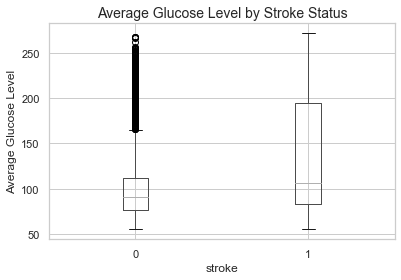

In [24]:

# Create a boxplot without the automatic title
bp = df.boxplot(column=['avg_glucose_level'], by='stroke')

# Set labels and title
plt.ylabel("Average Glucose Level")
plt.title("Average Glucose Level by Stroke Status", fontsize=14)

# Remove the default title
plt.suptitle("")

# Show the plot
plt.show()

### Fig. 11

This is a box plot that plotted the average glucose level distribution of the individuals who experienced or did not experience a stroke. On the x-axis, 0 indicates that the individuals have not suffered a stroke in the given time period and 1 indicates that they have experienced a stroke. The range of the average glucose level of those who have experienced a stroke is greater than those who did not experience a stroke. While this trend tracks alongside our previous observations (e.g., healthier individuals tend to have a more concentrated range of glucose levels, age could play a more influential factor, BMI could predispose certain individuals to develop other corroborating health issues), the sheer amount of outliers that span the graph from around 170 md/dl to 270 mg/dl is alarming. While there may be other factors that could corroborate this finding (e.g., testing done right after consumption of a meal, may face other health issues that could elevate their glucose level), it is intriguing that this much variability exists and yet they still did not experience a stroke. Maybe exploration into other factors, like stress, is pertinent to get a more holistic understanding and explanation of this phenomenon.

## Predictive Model

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.model_selection import RepeatedKFold,GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

## Chat GPT was used

In [53]:

df_train = pd.read_csv('./Data/training_cleaned.csv')
df_test = pd.read_csv('./Data/testing_cleaned.csv')

y_train = df_train['stroke']
X_train = df_train.drop('stroke', axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke', axis=1)

## Chat GPT was used

Notes from Visualization: hypertension, smoking status, heart disease, gender, age -- seem to be the most influencial variables. First step is to check using KMC

## KMC

In [55]:
#ffc is 'features for clustering'
#dfc is 'data for clustering'
dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['gender'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)

ffc = ['age', 'heart_disease', 'hypertension', 'stroke'] # I included stroke so i can see how the clusters vary in their stroke presence
dfc = pd.concat([df_train[ffc], dummies], axis=1)

num_clusters = 5 # number of clusters to look at

kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(dfc) # fit the model

# get cluster centers
cluster_centers = kmeans_model.cluster_centers_

# create a dataframe to display
cluster_centers_df = pd.DataFrame(cluster_centers, columns=dfc.columns)

print("Cluster Centers:")
print(cluster_centers_df)
     
## Chat GPT was used

/home/hek4z/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00ff4aa160>
Traceback (most recent call last):
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/pyth

Cluster Centers:
         age  heart_disease  hypertension    stroke  Never_worked   Private  \
0   7.986078       0.001634 -7.494005e-16  0.001634  1.470588e-02  0.104575   
1  56.546875       0.063477  1.474609e-01  0.052734 -1.734723e-17  0.614258   
2  74.673239       0.178873  2.281690e-01  0.147887 -1.691355e-17  0.487324   
3  40.784810       0.008055  5.178366e-02  0.011507 -1.691355e-17  0.686997   
4  24.720898       0.001403  1.262272e-02  0.001403  8.415147e-03  0.844320   

   Self-employed      children     Urban      Male         Other  \
0       0.013072  8.627451e-01  0.490196  0.539216  8.131516e-19   
1       0.193359  6.938894e-16  0.513672  0.422852  4.445229e-18   
2       0.384507  6.661338e-16  0.508451  0.401408  2.059984e-18   
3       0.132336  6.938894e-16  0.484465  0.367089  3.469447e-18   
4       0.057504  6.661338e-16  0.509116  0.340813  1.402525e-03   

   formerly smoked  never smoked    smokes  
0         0.027778      0.137255  0.004902  
1        

Age, heart disease, hypertension, gender (from visualization), urban, and smoking seem to be the biggest indicators.

## Linear Regression Model

In [43]:
X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease'] ] # most important numeric variables

expander = PolynomialFeatures(degree=2,include_bias=False) # expander
Z = expander.fit_transform(X_train_numeric)
names = expander.get_feature_names_out()
continuous = pd.DataFrame(data=Z, columns = names)

dummies_train = pd.concat([ pd.get_dummies(X_train['gender'],dtype='int',drop_first=True), # dummy vars for categorical
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)

Z_train = pd.concat([continuous,dummies_train],axis=1)

#repeat training process for test

X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease'] ]
expander = PolynomialFeatures(degree=2,include_bias=False)
Z = expander.fit_transform(X_test_numeric)
names = expander.get_feature_names_out()
continuous = pd.DataFrame(data=Z, columns = names)

dummies_test = pd.concat([ pd.get_dummies(X_train['gender'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)

Z_test = pd.concat([continuous,dummies_test],axis=1)

# fit the model
reg = LinearRegression().fit(Z_train, y_train)

# get R2 and RMSE
print('R2: ', reg.score(Z_test, y_test)) #R2
y_hat = reg.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   #RMSE

## Chat GPT was used
     

R2:  0.0840435058954554
RMSE:  0.19529206457263773


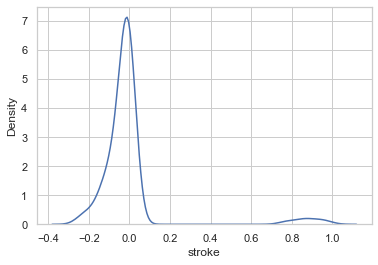

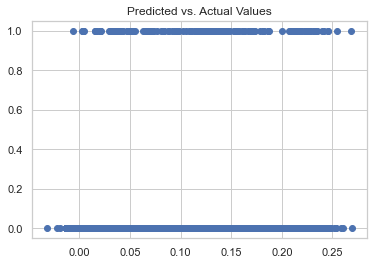

In [44]:
# predicted values:
y_hat_lm = reg.predict(Z_test)
residuals_lm = y_test - y_hat_lm

# residual plot:
sns.kdeplot(residuals_lm)
plt.show()

# predicted vs actual
plt.scatter(x=y_hat_lm, y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Chat GPT was used
     

These variables on a Linear Model provided a smaller RMSE value than the example given in the write up. To me, this indicates that weighing these specific variables yields better predictors.

## Decision Tree

In [50]:
# keeping same variables for decision tree model
X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease', 'bmi'] ]
expander = PolynomialFeatures(degree=2,include_bias=False)
Z = expander.fit_transform(X_train_numeric)
names = expander.get_feature_names_out()
continuous = pd.DataFrame(data=Z, columns = names)


Z_train = expander.fit_transform(X_train_numeric)

# training setup
dummies_train = pd.concat([ pd.get_dummies(X_train['gender'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)

X_train_combined = pd.concat([pd.DataFrame(data=Z_train, columns=expander.get_feature_names_out()),
                              dummies_train], axis=1)

# testing setup
X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease', 'bmi'] ]
expander = PolynomialFeatures(degree=2,include_bias=False)
Z = expander.fit_transform(X_test_numeric)

Z_test = expander.fit_transform(X_train_numeric)

dummies_test = pd.concat([ pd.get_dummies(X_train['gender'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)

X_test_combined = pd.concat([pd.DataFrame(data=Z_test, columns=expander.get_feature_names_out()),
                             dummies_test], axis=1)

# get kfold
kf =RepeatedKFold(n_splits=10,n_repeats =5, random_state=30)

scoring = {'r2': 'r2', 'neg_mean_squared_error': 'neg_mean_squared_error'}

param = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# get and fit decision tree
reg = DecisionTreeRegressor(random_state=42)
search = GridSearchCV(reg, param, scoring=scoring, n_jobs=-1, cv=kf,refit='r2')
model = search.fit(X_train_combined, y_train)

pred = model.predict(X_test_combined)
     
## Chat GPT was used

In [48]:
test_rmse = np.sqrt(mean_squared_error(y_test, pred))
test_r2 = r2_score(y_test, pred)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)
     
## Chat GPT was used

Test RMSE: 0.1574049582879779
Test R2: 0.40496505717823117


Even lower test RMSE achieved! It was ~0.19, but then I added bmi on a whim and it lowered the RMSE down to 0.15. I then added ever_married for fun, but that raised the RMSE, so I took it out again.

## Conclusion:

After thoroughly analyzing our findings derived from our predictive model and visualizations from the given datasets, we have uncovered fascinating insights surrounding complex elements that affect the risk of stroke. First of all, we noticed that our findings align with published research that women tend to have a higher incidence of stroke than men. The variability in the distribution of the age groups of women included in our dataset (spanning a high concentration from age 20 to 65) supports the above conclusion as a multitude of different factors like pregnancy, longevity, and consuming birth control medication amongst others, common amongst the range of women included in the dataset, could have caused this phenomenon to occur. Concerning males, we noticed that there was a higher concentration of individuals in the older age bracket, specifically in the age range of 40 to 70. While most of the graphs had an overall trend of having healthier participants concerning body mass index level and average glucose rate, we noticed that the body mass index for males in this data had the highest concentration around 25 to 35 (falling around the range of overweight to slightly obese in the normal weight classification for men). Men between the ages of 51 to 69 are typically more overweight than other age groups (due to becoming more susceptible to other corroborating diseases like diabetes, high blood pressure, high cholesterol, etc.), and there was a higher concentration of men within the age range of 40 to 70, making it a reasonable explanation for observing this trend. When we scrutinized the relationship stroke had with other corroborating factors like age, BMI, and average glucose level, we noticed that the age variable had a stronger correlation with the susceptibility to have a stroke in comparison to the other variables. Intriguingly, we noticed the higher variability in average glucose level and body mass index for those who did not experience a stroke in this time period in comparison to those who did led us to believe that there may be other unexplored factors that could have a larger role in determining what increased the susceptibility for stroke.

Using predictive modeling turned out to be instrumental in understanding the data. Once each variable was visualized, it became easier to understand the importance of each variable. Then, by monitering the results of the R2 and RMSE values, the relationship between stroke and different possible causes became clearer. For instance, age and BMI are two variables that greatly affected the performance of the model. One notable discovery was in understanding the average glucose variable. This variable improved the performance of the linear regression model but had an inverse effect on the decision tree. The correlation here conveys the importance of the model in addition to an understanding of the variables.

Our decision tree stands out as the most effective predictive model for determining whether an individual has experienced a stroke, primarily because it boasts the highest R-squared value among our models at 0.40496. This significant R-squared value indicates that the model explains 40.50% of the variation in the data. The strength of this model is underscored by its low Roots Mean Square Error (RMSE) of 0.157, highlighting that the decision tree is the best fit for our data set compared to the other models.

However, we acknowledge potential shortcomings in our data analysis that may invite criticism. We noticed that our findings strayed from typical health narratives and research. Our visualizations provided intriguing insight that those who had heart disease, smoked, or had hypertension were less likely to experience a stroke than participants who did not have these conditions. While these are unexpected and contradictory patterns, it is important to note that we did not have access to other influential risk factors that may take precedence over these given conditions (i.e., family history, anxiety, depression, high stress levels, and/or other medical conditions like a tumor that could have a higher stake in the probability). Stroke etiology is complex and multifaceted - a finding that is supported by the multiple studies and secondary data sources we have cited throughout this paper. As risk is determined by a combination of genetics, lifestyle, and environment, our findings still hold value as they can be viewed as a review of a piece of a larger puzzle and not a comprehensive review.

With that being said, we recommend that a wider range of demographic groupings and health issues be included in a more diverse dataset for future studies. While this is out of the scope of our problem at hand, we believe it would make it possible to analyze the risk factors for stroke in a more representative manner across various groups. In addition, to further analyze the impact and relative risk of the variables, it would be pertinent if longitudinal data could be included. This could potentially alleviate the struggles we faced when analyzing our results and could provide a more dynamic perspective that could uncover other factors that lead to stroke.

## Appendix

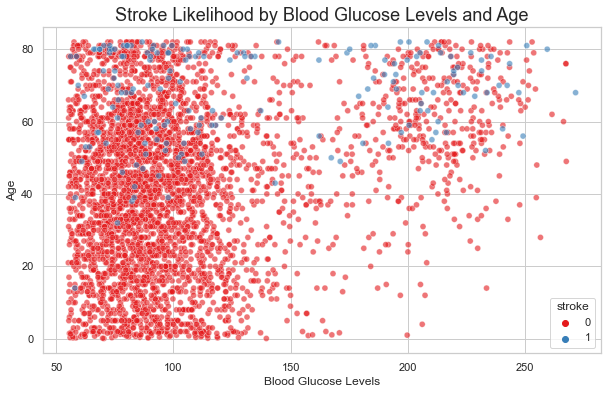

In [ ]:
# Scatterplot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='age', data=df, hue='stroke', palette='Set1', marker='o',alpha =.6)

# Set labels and title
plt.xlabel('Blood Glucose Levels')
plt.ylabel('Age')
plt.title('Stroke Likelihood by Blood Glucose Levels and Age',fontsize=18)

# Show the plot
plt.show()

# chatgpt helped make this graph

### Fig. 12.

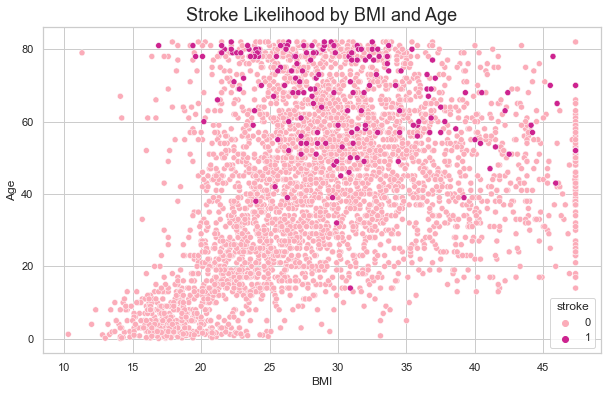

In [ ]:
# Scatterplot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='age', data=df, hue='stroke', palette='RdPu', marker='o')

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Stroke Likelihood by BMI and Age',fontsize=18)

# Show the plot
plt.show()


### Fig. 13.

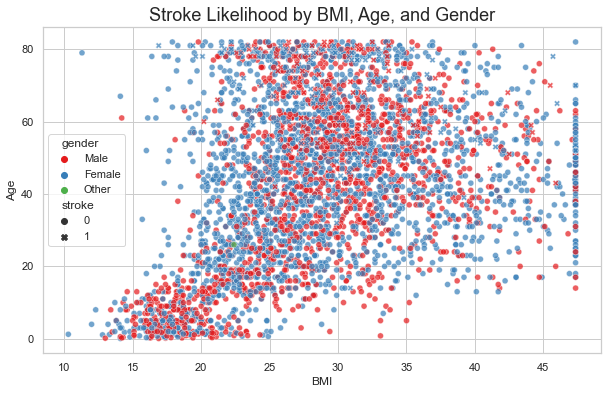

In [ ]:
# Scatterplot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='age', data=df, hue='gender', style='stroke', palette='Set1',alpha =.7)

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Stroke Likelihood by BMI, Age, and Gender',fontsize=18)

# Show the plot
plt.show()

### Fig. 14.

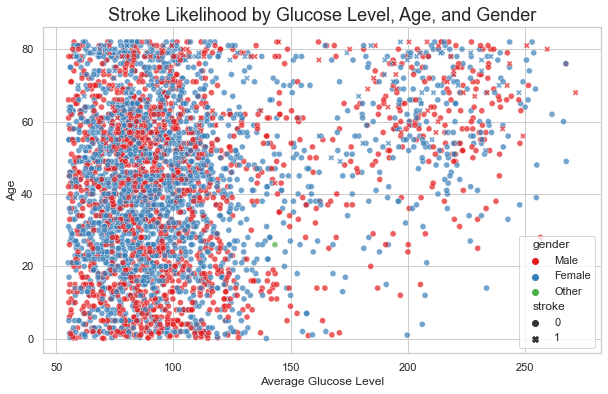

In [ ]:
# Scatterplot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='age', data=df, hue='gender', style='stroke', palette='Set1',alpha=.7)

# Set labels and title
plt.xlabel('Average Glucose Level')
plt.ylabel('Age')
plt.title('Stroke Likelihood by Glucose Level, Age, and Gender',fontsize=18)

# Show the plot
plt.show()